In [21]:
from wrangle_data_funcs import *
from modelling_funcs import *
from predict_gw_scores import *
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Running

## get_params

In [2]:
training_years, training_n_gws, pred_year, pred_gw, alpha, rolling_gws, features, model_func, avg_type, output = get_params()

## get_training_df

In [3]:
training_df = get_training_df(training_years, training_n_gws, avg_type, alpha, rolling_gws)

c:\Users\dellis2\OneDrive - Illumina, Inc\Documents\fpl\draft_fpl_2526\transfer\wrangle_data_funcs.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gw_df = pd.concat(gw_df_list)


## Everything else

In [4]:
_ = test_model(training_df, features, model_func)
prediction_df = get_prediction_df(pred_year, pred_gw, avg_type, alpha, rolling_gws)
pred_df = train_full_model(training_df, features, prediction_df, model_func)
pred_df = merge_ownership_data(pred_df)
pred_df_simple = pred_df[['full_name', 'position', 'team', 'ewma_total_points', 'predicted_points', 'owner']]


{'GK': 2.305, 'DEF': 2.261, 'MID': 2.24, 'FWD': 2.541}


# again

In [5]:
training_years, training_n_gws, pred_year, pred_gw, alpha, rolling_gws, features, model_func, avg_type, output = get_params()
# print(training_year, training_n_gws, pred_year, pred_gw, alpha, features, model, output)
training_df = get_training_df(training_years, training_n_gws, avg_type, alpha, rolling_gws)
training_df_scaled, _ = scale_df(training_df, features)
_ = test_model(training_df_scaled, features, model_func)
prediction_df = get_prediction_df(pred_year, pred_gw, avg_type, alpha, rolling_gws)
prediction_df_scaled, _ = scale_df(prediction_df, features)
pred_df = train_full_model(training_df_scaled, features, prediction_df_scaled, model_func)
pred_df = merge_ownership_data(pred_df)
pred_df_simple = pred_df[['full_name', 'position', 'team', 'ewma_total_points', 'predicted_points', 'owner']]

c:\Users\dellis2\OneDrive - Illumina, Inc\Documents\fpl\draft_fpl_2526\transfer\wrangle_data_funcs.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gw_df = pd.concat(gw_df_list)


{'GK': 2.305, 'DEF': 2.261, 'MID': 2.24, 'FWD': 2.541}


In [9]:
pred_df_simple_before = pd.read_csv('outputs/predicted_gw18_simple.csv')

In [10]:
pred_df_simple.sort_values(by='predicted_points', ascending=False).head(10)

,full_name,position,team,ewma_total_points,predicted_points,owner
97,bruno_borges_fernandes,MID,Man Utd,4.326481,6.298023,87737.0
209,erling_haaland,FWD,Man City,5.575856,6.095577,88376.0
176,dominic_calvert_lewin,FWD,Leeds,4.465300,5.995112,85646.0
607,phil_foden,MID,Man City,5.298217,5.905371,88376.0
509,matheus_santos_carneiro_da_cunha,MID,Man Utd,2.799466,5.884095,88376.0
547,morgan_rogers,MID,Aston Villa,4.604120,5.652812,93330.0
51,antoine_semenyo,MID,Bournemouth,2.521827,5.396421,87737.0
274,hugo_ekitike,FWD,Liverpool,4.326481,5.374679,85646.0
52,anton_stach,MID,Leeds,3.215925,5.246478,88376.0
101,bukayo_saka,MID,Arsenal,2.660647,4.936481,87737.0


In [14]:
pred_df_simple_combined = pred_df_simple.merge(pred_df_simple_before[['full_name', 'predicted_points']], on=['full_name'], suffixes=('_after', '_before'))

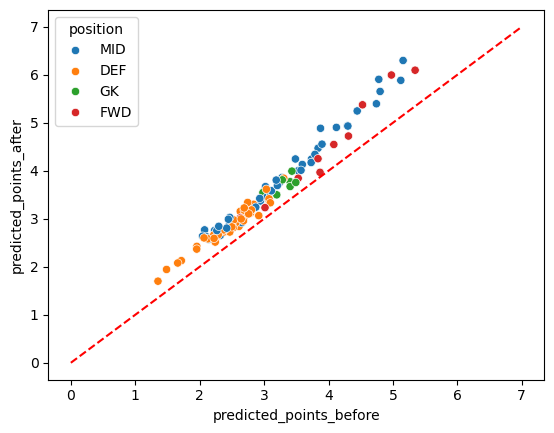

In [23]:
sns.scatterplot(data=pred_df_simple_combined.query('ewma_total_points>1'), x='predicted_points_before', y='predicted_points_after', hue='position')
plt.plot([0, 7], [0, 7], color='red', linestyle='--')

# Checking coeffs

In [24]:
def train_full_model(training_df, features, prediction_df, model_func):
    model_dict, _ = create_model(training_df, features, model_func, test=False)
    pred_df = predict_scores(prediction_df.dropna(), features, model_dict)
    return pred_df, model_dict

In [25]:
training_years, training_n_gws, pred_year, pred_gw, alpha, rolling_gws, features, model_func, avg_type, output = get_params()
# print(training_year, training_n_gws, pred_year, pred_gw, alpha, features, model, output)
training_df = get_training_df(training_years, training_n_gws, avg_type, alpha, rolling_gws)
training_df_scaled, _ = scale_df(training_df, features)
_ = test_model(training_df_scaled, features, model_func)
prediction_df = get_prediction_df(pred_year, pred_gw, avg_type, alpha, rolling_gws)
prediction_df_scaled, _ = scale_df(prediction_df, features)
pred_df, model_dict = train_full_model(training_df_scaled, features, prediction_df_scaled, model_func)
pred_df = merge_ownership_data(pred_df)
pred_df_simple = pred_df[['full_name', 'position', 'team', 'ewma_total_points', 'predicted_points', 'owner']]

c:\Users\dellis2\OneDrive - Illumina, Inc\Documents\fpl\draft_fpl_2526\transfer\wrangle_data_funcs.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gw_df = pd.concat(gw_df_list)


{'GK': 2.305, 'DEF': 2.261, 'MID': 2.24, 'FWD': 2.541}


In [29]:
coefs = pd.DataFrame({'GK': model_dict['GK'].coef_,
              'DEF': model_dict['DEF'].coef_,
              'MID': model_dict['MID'].coef_,
              'FWD': model_dict['FWD'].coef_}, index=features
              )

In [30]:
coefs

,GK,DEF,MID,FWD
assists,0.000000,0.000000,0.000000,-0.000000
bonus,-0.000000,0.000000,-0.000000,0.013989
bps,0.213336,0.151641,0.000000,0.011443
clean_sheets,0.082445,0.000000,0.046647,0.000000
goals_conceded,0.000000,0.000000,0.000000,0.029030
goals_scored,-0.000000,0.000000,0.000000,0.049837
influence,0.000000,0.000000,0.000000,0.000000
creativity,0.000000,0.118134,0.178292,0.124600
threat,-0.000000,0.000000,0.274799,0.029600
ict_index,0.000000,0.092908,0.106039,0.076793
